## Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1) Load data

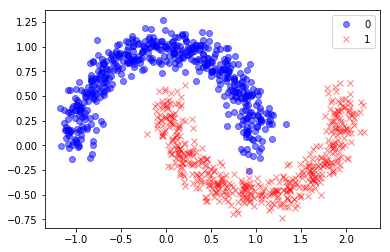

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

### Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

#### Shallow Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [9]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [13]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 108us/step


In [15]:
results ## result are [binary_crossentropy loss, accuracy]

[0.31917323112487794, 0.8366666674613953]

In [18]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.837


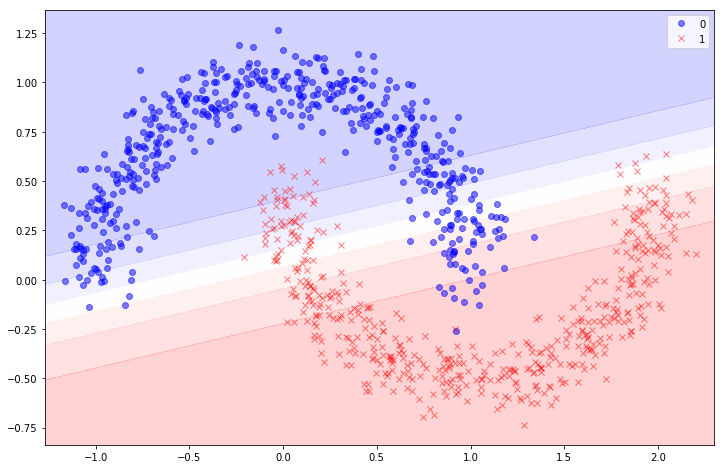

In [20]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [21]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [23]:
model.evaluate(X_test, y_test) ## result are [binary_crossentropy loss, accuracy]

300/300 [==============================] - 0s 174us/step


[0.002073951584752649, 1.0]

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)



print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


#### you can also use model.predict or model.predict_proba to get probability

In [43]:
y_test_probability = model.predict_proba(X)
y_test_probability[:5]

array([[9.9979097e-01],
       [9.9981350e-01],
       [2.0878074e-04],
       [9.9974757e-01],
       [9.9983847e-01]], dtype=float32)

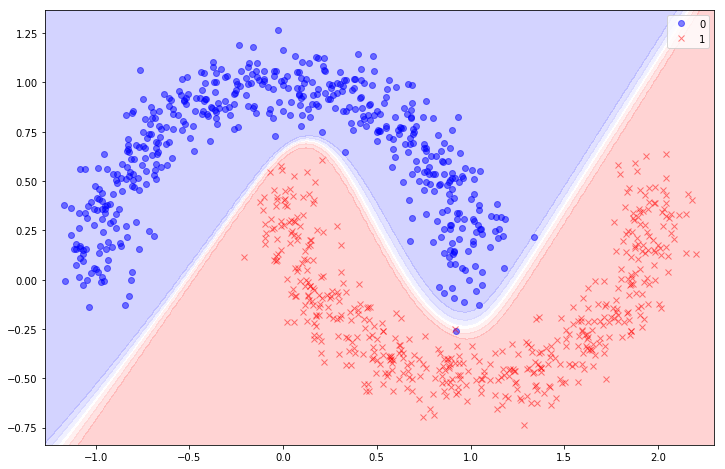

In [44]:
plot_decision_boundary(model, X, y)

## Multiclass classification
#### The Iris dataset

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

In [40]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


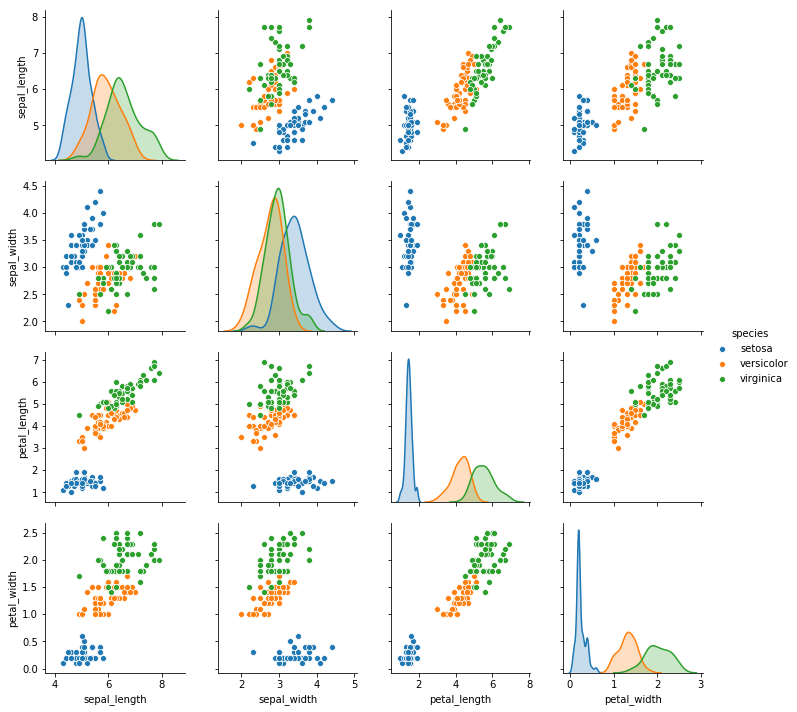

In [6]:
sns.pairplot(df, hue="species")

In [7]:
X = df.drop('species',axis=1)

##### Make y one hot 

In [19]:
target_name=df['species'].unique()
target_dict = {n:i for i,n in enumerate(target_name)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [22]:
y = df['species'].map(target_dict)
y_cat = to_categorical(y)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

#### Train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

##### Build model

In [26]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1,verbose=False) ## add validation 

In [32]:
y_pred = model.predict(X_test)
y_pred[:5]  ## show probabilities for each category

array([[9.7133821e-01, 2.8652648e-02, 9.1030561e-06],
       [9.6602160e-01, 3.3967752e-02, 1.0582967e-05],
       [7.0145715e-04, 2.6129514e-01, 7.3800337e-01],
       [2.5551306e-02, 7.6626366e-01, 2.0818502e-01],
       [5.6421693e-05, 4.1613162e-02, 9.5833039e-01]], dtype=float32)

In [39]:
## you can use predict_class to get calss 
y_pred_class = model.predict_classes(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred[:5]
## or just use numpy functions 
#y_test_class = np.argmax(y_test, axis=1)
#y_pred_class = np.argmax(y_pred, axis=1)

array([0, 0, 2, 1, 2])

In [41]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



In [42]:
confusion_matrix(y_test_class, y_pred_class)

array([[14,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 11]])